In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import k_clique_communities
import networkx.algorithms.community as nx_comm
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import itertools
import numpy as np
import infomap
from infomap import Infomap
import pandas as pd
from utils import *

# Worm cortex Graph community detection. 
### The connectome of the anterior section of the hermaphrodite c. elegans. The source of this data is from the second listed dataset at wormatlas. 
#####  https://neurodata.io/project/connectomes/
##### https://github.com/ericmjonas/circuitdata/tree/master/celegans_herm


2478 edges and 279 nodes
3


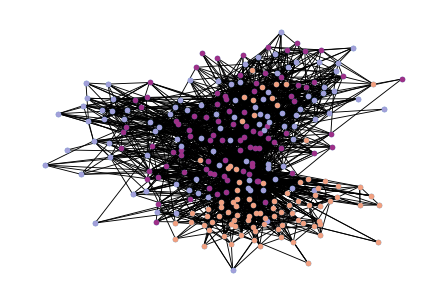

In [2]:
# Read in graph
G = nx.read_graphml('../Datasets/c.elegans.herm_pharynx_1.graphml')
G = G.to_undirected()

print(f"{G.number_of_edges()} edges and {G.number_of_nodes()} nodes")

cell_name_attr = nx.get_node_attributes(G,'cell_name').values()
role_attr = nx.get_node_attributes(G,'role').values()
cell_class_attr = nx.get_node_attributes(G,'cell_class').values()
neuro_attr = nx.get_node_attributes(G,'neurotransmitters').values()
soma_attr = nx.get_node_attributes(G,'soma_pos').values()


# create pandas dataframe for analysis of metadata
df = pd.DataFrame({'cell name':cell_name_attr,'role':role_attr, 'cell class':cell_class_attr,'neurtransmitters':neuro_attr,'soma_pos':soma_attr})


print(len(df["role"].value_counts()))
# role has 3 classes and neurtransmitters has 7. These could relate to communities.
# Seperate nodes into lists for each role
roles = [[] for _ in range(len(df["role"].value_counts()))]

for key,value in nx.get_node_attributes(G,'role').items():
    if value == 'NA':
        roles[0].append(key)
    if value == 'S':
        roles[1].append(key)
    if value == 'M':
        roles[2].append(key)

# Color nodes based on their roles
presentBioCommunities(G,roles) 

NA          161
Ach          74
GABA         26
DA            8
5-HT          4
Ach,5-HT      4
GLU           2
Name: neurtransmitters, dtype: int64


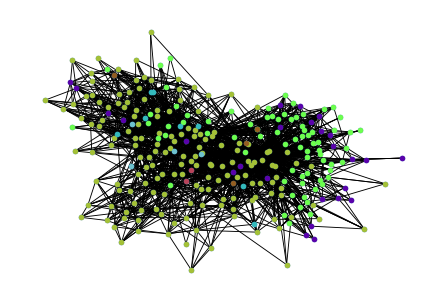

In [3]:
neurotransmitters_list = [[] for _ in range(len(df["neurtransmitters"].value_counts()))]

print(df["neurtransmitters"].value_counts())

for key,value in nx.get_node_attributes(G,'neurotransmitters').items():

    if value == 'NA':
        neurotransmitters_list[0].append(key)
    if value == 'Ach':
        neurotransmitters_list[1].append(key)
    if value == 'GABA':
        neurotransmitters_list[2].append(key)
    if value == 'DA':
        neurotransmitters_list[3].append(key)
    if value == '5-HT':
        neurotransmitters_list[4].append(key)
    if value == 'Ach,5-HT':
        neurotransmitters_list[5].append(key)
    if value == 'GLU':
        neurotransmitters_list[6].append(key)

# Color nodes based on their roles
presentBioCommunities(G,neurotransmitters_list) 

# Girvan Newman 
##### Invesitigate how modularity changes as more disconections are made and more communities are found

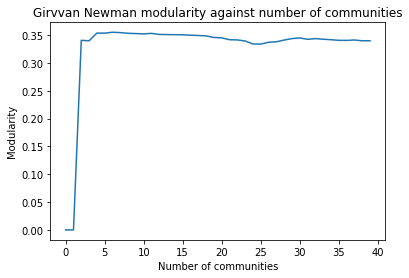

CPU times: user 3min 14s, sys: 81.8 ms, total: 3min 14s
Wall time: 3min 14s


In [4]:
%%time
# Algorithm 1. Girvan Newman 
partition_girvan_newman = girvan_newman(G)
k = 40 # Check 39 partitions

mod_list = []
for communities in itertools.islice(partition_girvan_newman, k):
    partitions = tuple(sorted(c) for c in communities)
    # Use modularity to check partition
    GN_mod = nx_comm.modularity(G,partitions)
    mod_list.append(GN_mod)

# plot partitions with k to optimize modularity
plt.plot(mod_list)
plt.xlabel("Number of communities")
plt.ylabel("Modularity")
plt.title("Girvvan Newman modularity against number of communities")
plt.show()

##### Set stopping point at 5 communities in order to maximize modularity


5 communities detected
The modularity is 0.34


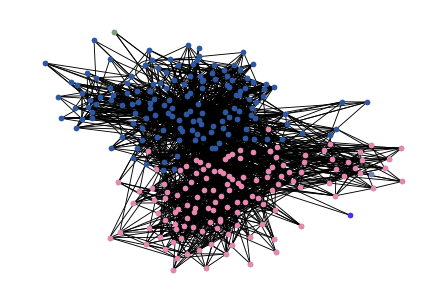

CPU times: user 2min 28s, sys: 22.4 ms, total: 2min 28s
Wall time: 2min 28s


In [13]:
%%time 
partition_girvan_newman = girvan_newman(G)
k=4 # if we have apriori knowledge of 15 groudn truth communities:
for communities in itertools.islice(partition_girvan_newman, k):
    partitions = tuple(sorted(c) for c in communities)

GN_mod = nx_comm.modularity(G,partitions)
print(f"{len(partitions)} communities detected")
print(f"The modularity is {GN_mod:.3}")
presentBioCommunities(G,partitions)

# Infomap
#####  https://github.com/mapequation/infomap

(['n54', 'n53', 'n56', 'n55', 'n150', 'n149', 'n58', 'n109', 'n57', 'n157', 'n110', 'n66', 'n156', 'n70', 'n160', 'n27', 'n67', 'n141', 'n0', 'n140', 'n154', 'n155', 'n91', 'n111', 'n71', 'n6', 'n171', 'n152', 'n172', 'n205', 'n34', 'n148', 'n36', 'n208', 'n138', 'n108', 'n23', 'n63', 'n127', 'n151', 'n126', 'n100', 'n81', 'n80', 'n139', 'n35', 'n93', 'n207', 'n162', 'n99', 'n255', 'n22', 'n24', 'n37', 'n163', 'n92', 'n246'], ['n60', 'n165', 'n164', 'n175', 'n166', 'n181', 'n167', 'n185', 'n178', 'n129', 'n188', 'n128', 'n83', 'n169', 'n184', 'n168', 'n2', 'n189', 'n179', 'n223', 'n186', 'n224', 'n196', 'n197', 'n221', 'n82', 'n187', 'n124', 'n85', 'n115', 'n84', 'n117', 'n121', 'n120', 'n133', 'n114', 'n193', 'n232', 'n192', 'n118', 'n119', 'n236', 'n125', 'n116', 'n183', 'n131', 'n235', 'n122', 'n191', 'n132', 'n130', 'n182', 'n198', 'n230', 'n123', 'n190', 'n234', 'n229', 'n215', 'n228', 'n233', 'n226', 'n199', 'n227', 'n216', 'n225', 'n214', 'n212', 'n211', 'n209', 'n213', 'n210'],

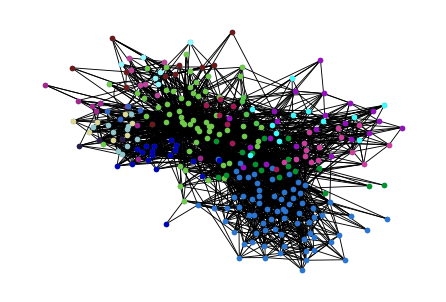

CPU times: user 656 ms, sys: 164 ms, total: 820 ms
Wall time: 353 ms


In [6]:
%%time
# Algorithm 2. k infomap
im = Infomap(silent=True)
im.add_networkx_graph(G)
im.run()

partition = [[] for _ in range(im.num_top_modules)]
for node in im.tree:
    if node.is_leaf:
        partition[node.module_id-1].append("n"+ str(node.node_id))

partitions = tuple(partition)

info_mod = nx_comm.modularity(G,partitions)
print(f"{len(partitions)} communities detected")
print(f"The modularity is {info_mod:.3}")

presentBioCommunities(G,partitions)

# Spectral Clustering

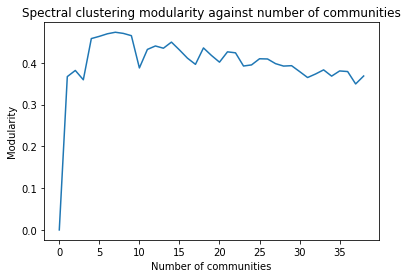

CPU times: user 2min 6s, sys: 1min 9s, total: 3min 15s
Wall time: 34.4 s


In [7]:
%%time
# Algorithm 3. Spectral clustering
# Get adjacency-matrix as numpy-array
sc_mod_list = []
for k in range(1,40):
    adj_mat = nx.to_numpy_matrix(G)
    # Cluster
    sc = SpectralClustering(k, affinity='precomputed', n_init=100)
    sc.fit(adj_mat)

    partition_labels = sc.labels_.tolist()
    # Turn back into partition data structure ([],[],[]...)
    # position in list is node number value is community id

    partition = [[] for _ in range(max(partition_labels)+1)]
    for idx,c in enumerate(partition_labels):
        partition[c].append("n"+ str(idx))

    sc_mod = nx_comm.modularity(G,tuple(partition))
    sc_mod_list.append(sc_mod)

# Plot modularity for increasing community number
plt.plot(sc_mod_list)
plt.xlabel("Number of communities")
plt.ylabel("Modularity")
plt.title("Spectral clustering modularity against number of communities")
plt.show()

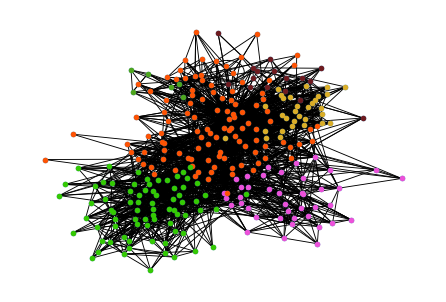

6 communities detected
The modularity is 0.463
CPU times: user 1.27 s, sys: 344 ms, total: 1.62 s
Wall time: 676 ms


In [11]:
%%time
k=6 #for maximum modularity
# Get adjacency-matrix as numpy-array
adj_mat = nx.to_numpy_matrix(G)
# Cluster
sc = SpectralClustering(k, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

partition_labels = sc.labels_.tolist()
# Turn back into partition data structure ([],[],[]...)
# position in list is node number value is community id

partition = [[] for _ in range(max(partition_labels)+1)]
for idx,c in enumerate(partition_labels):
    partition[c].append("n"+ str(idx))

# Need to decide when to stop removing edges.
presentBioCommunities(G,partition)

sc_mod = nx_comm.modularity(G,tuple(partition))
print(f"{len(partition)} communities detected")
print(f"The modularity is {sc_mod:.3}")

# Analysis

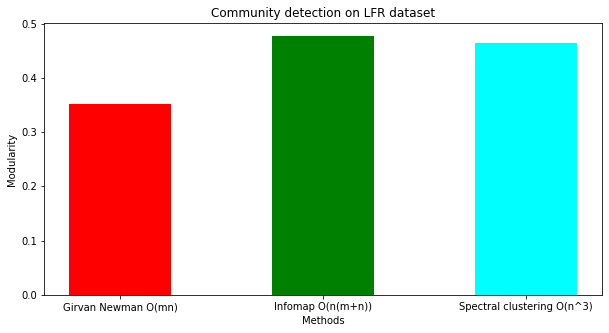

In [12]:
# Compare methods
data = {'Girvan Newman O(mn)':GN_mod, 'Infomap O(n(m+n))':info_mod,
        'Spectral clustering O(n^3)':sc_mod}
method = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(method, values,
        width = 0.5, color=['red', 'green', 'cyan'])
 
plt.xlabel("Methods")
plt.ylabel("Modularity")
plt.title("Community detection on LFR dataset")
plt.show()

In [10]:
# Measure overlap of found communities with node class metadata
# measure overlap of clusters values with some metric to se>>> from sklearn.metrics.cluster import normalized_mutual_info_score
